In [1]:
import numpy as np
import QMC_square as qmc
from matplotlib import pyplot as plt 
from matplotlib import colors as mclr
from matplotlib import cm
import time as time

import importlib

### Plotting settings 
#plt.rc('figure', dpi=100)
#plt.rc('figure',figsize=(4,1.7))
plt.rc('font', family = 'Times New Roman')
plt.rc('font', size = 14)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=18)
plt.rc('lines', linewidth=2.5)

In [14]:
L = 5
M = np.array([8,10,12,14])
dt = 0.1

temperatures = qmc.QMC.compute_temperature(dt,M)
print(temperatures)
Ej = 1.
Ec = 0.1

nburn = 0
nsample = 10
nstep = int(1e3)

over_relax = False

tf = 10.
ntimes = 200

[1.25       1.         0.83333333 0.71428571]


In [115]:
samples = qmc.QMC(Ej,Ec,T,L,M)

In [116]:
samples.set_sampling(nburn,nsample,nstep)
samples.burn()
samples.sample()

In [117]:
import TWA_square as twa

In [118]:
importlib.reload(twa)

<module 'TWA_square' from '/home/jcurtis/Projects/XYML/src/TWA_square.py'>

In [119]:
twa_sim = twa.TWDynamics(samples,tf,ntimes)

In [120]:
twa_sim.run_dynamics()

In [121]:
twa_sim.dof_t.shape

(200, 2, 5, 5, 20)

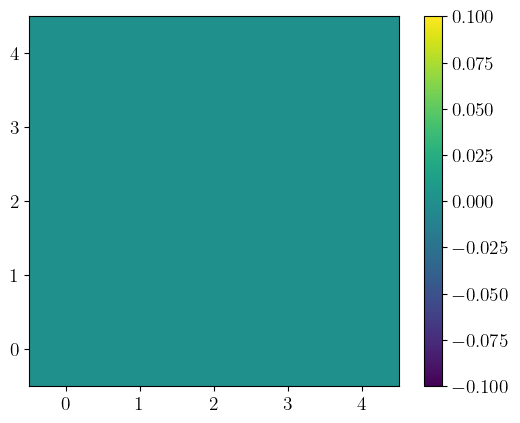

In [122]:
plt.imshow(twa_sim.dof_t[0,1,:,:,0],origin='lower')
plt.colorbar()
plt.show()

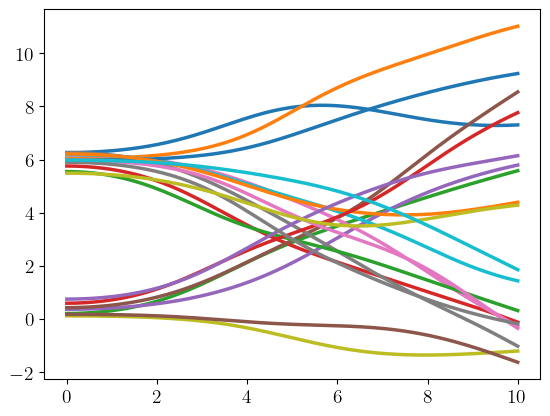

In [126]:
for i in range(nsample):
    plt.plot(twa_sim.times,twa_sim.trajectories[:,0,0,i])
plt.show()

In [124]:
print(twa_sim.times[0])

0.0


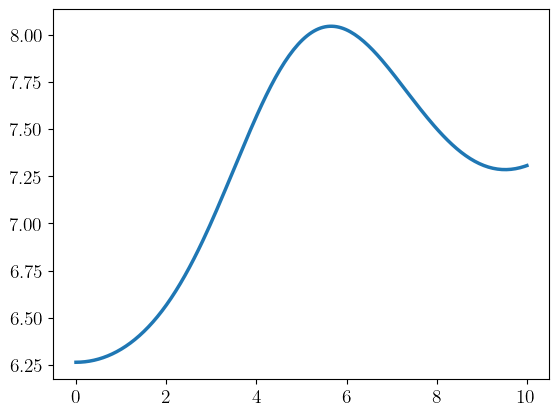

In [125]:
plt.plot(twa_sim.times,twa_sim.trajectories[:,0,0,0])
plt.show()